# 기출문제 풀이(3)

## 1. 머신러닝
- 데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리  
- 데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv  
- 데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기  
> LotArea : 대지면적(square feet)  
 LotFrontage : 도로 근접 거리??(Linear feet)  
 YearBuilt : 최초 건축 년도  
 1stFlrSF : 1층 크기(square feet)  
 2ndFlrSF : 2층 크기(square feet)  
 YearRemodAdd : 리모델링년도  
 TotRmsAbvGrd : 방 개수(욕실 제외)  
 KitchenAbvGr : 주방 개수??  
 BedroomAbvGr : 침실 개수??  
 GarageCars : 주차 대수??  
 GarageArea : 차고 크기(square feet)  
 price : 가격(dollars)  

In [ ]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# 그래프 한글폰트 깨짐 방지
#path="c:/Windows/Fonts/malgun.ttf"
path="C:/Users/BOBO/Documents/Python/malgun.ttf"
from matplotlib import font_manager, rc
#help(matplotlib.font_manager)
font_name = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
#plt.rc('font', family='Malgun Gothic')

### 1-1. EDA 및 데이터 전처리
시각화 및 통계량 제시

- 데이터 불러오기

In [ ]:
df_org = pd.read_csv('./DATA/220227_problem1.csv')
df_org

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,62.0,1999,953,694,2000,7,1,3,2,460,12.072547
1456,1457,13175,85.0,1978,2073,0,1988,7,1,3,2,500,12.254868
1457,1458,9042,66.0,1941,1188,1152,2006,9,1,4,1,252,12.493133
1458,1459,9717,68.0,1950,1078,0,1996,5,1,2,1,240,11.864469


- 기술통계량 등 확인

In [ ]:
df_org.info()
## 전체 수치형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [ ]:
df_org.describe()
## 2ndFlrSF는 2층이 없으면 0, GarageArea도 차고가 없으면 0일 수 있는데
## KitchenAbvGr, BedroomAbvGr이 0인 데이터(주방이랑 침실이 0개)는 이상치로 볼 수 있나?

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


- 분포 확인

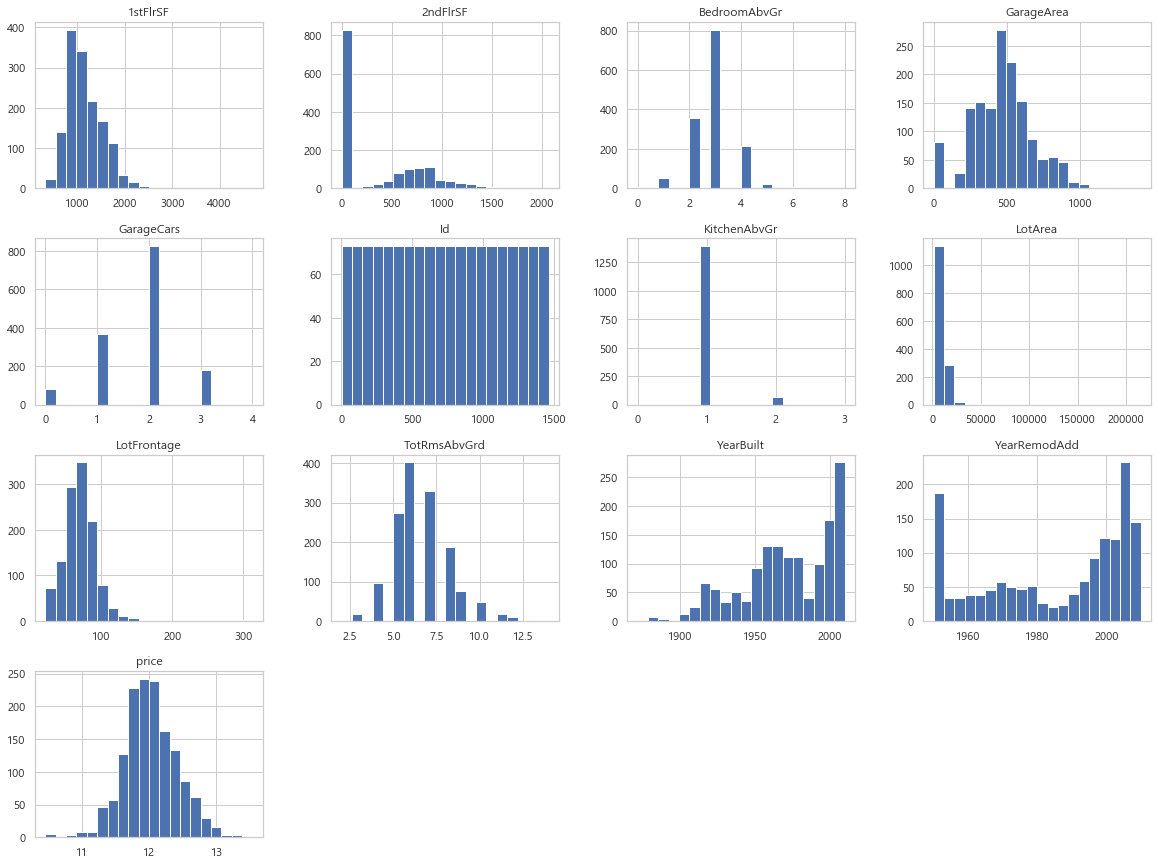

In [ ]:
## 전체(수치형, price 포함) 데이터에 대한 histogram
tmp = df_org.hist(figsize = (20, 15), bins = 20)

## price이 정규분포 형태로 보이므로 별도의 로그변환(log1p) 등이 불필요함
## 1stFlrSF, LotFrontage, TotRmsAbvGrd는 정규분포를 띄고 있음

- 변수별 상관관계 확인

C:\Users\BOBO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BOBO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


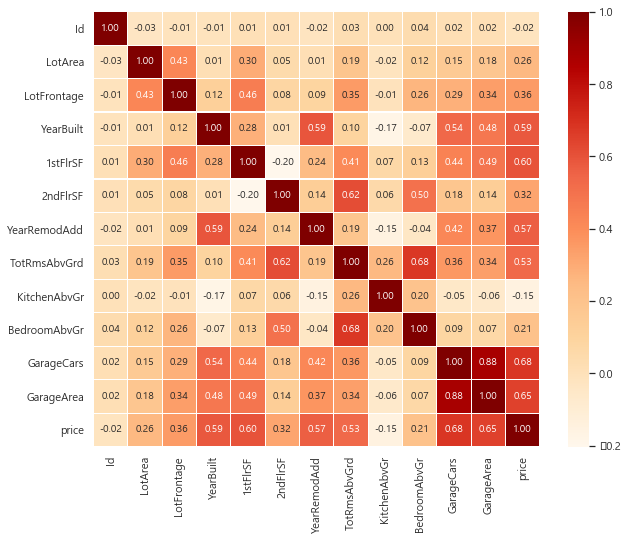

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_org.corr(), annot = True, fmt=".2f", cmap = "OrRd", linewidths=0.2)
plt.show()
## price : GarageCars, GarageArea, 1stFlrSF, YearBuilt, YearRemodAdd, TotRmsAbvGrd
## YearRemodAdd - YearBuilt 0.59
## TotRmsAbvGrd - 2ndFlrSF 0.62
## TotRmsAbvGrd - BedroomAbvGr 0.68
## GarageCars - GarageArea 0.88
## 1.0 ~ 0.7 : 강한 음/양의 상관관계
## 0.7 ~ 0.3 : 뚜렷한 음/양의 상관관계
## 0.3 ~ 0.1 : 약한 음/양의 상관관계
## 0.1 ~ 0 : 상관관계 없음

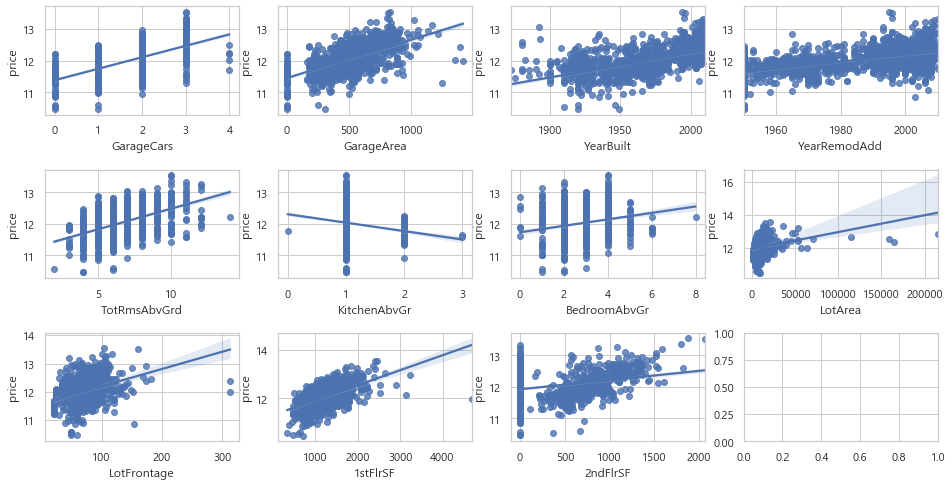

In [ ]:
## 수치형 데이터의 각 집합의 조합에 대해 히스토그램과 분포도 그리기

# sns.set()
# cols = ["LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF"]
# sns.pairplot(df_org, x_vars=cols, y_vars="price", kind='reg', size=3)
# plt.show()

# 3개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , nrows=3, ncols=4)
fig.subplots_adjust(hspace=0.5)
cols = ["GarageCars", "GarageArea", "YearBuilt", "YearRemodAdd", "TotRmsAbvGrd", "KitchenAbvGr", \
         "BedroomAbvGr", "LotArea", "LotFrontage", "1stFlrSF", "2ndFlrSF"]
for i, var_x in enumerate(cols):
    row = int(i/4)
    col = i%4
    # seabon regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=var_x , y='price',data=df_org , ax=axs[row][col])
    
## GarageCars, GarageArea, YearBuilt, YearRemodAdd, TotRmsAdvRgd의 영향도가 두드러지게 나타남(양 방향의 선형성이 큼)

- 결측치 확인 및 대체

In [ ]:
tot = df_org.isna().sum().sort_values(ascending=False)
per = (df_org.isna().sum()/1460*100).sort_values(ascending=False)  # or 1460 -> df_org.isna().count()
missing = pd.concat([tot, per], axis=1, keys=['total', 'percent'])
missing
## LotFrontage 결측치 17% 존재

,total,percent
LotFrontage,259,17.739726
price,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
YearRemodAdd,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000


In [ ]:
df_org2 = df_org.copy()

## 평균 대체
#df_org2['LotFrontage'].fillna(df_org2['LotFrontage'].mean(), inplace=True)
#df_org2.isna().sum()

## 결측비율이 15%가 넘고, price와 상관관계도 약하므로, 평균대체 하지않고 변수 삭제함
## ID도 상관관계가 없고, 분포상으로도 의미없는 데이터(단순식별자)이므로 변수 삭제함
df_org2.drop(columns=['LotFrontage', 'Id'], axis=1, inplace=True)
df_org2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   1stFlrSF      1460 non-null   int64  
 3   2ndFlrSF      1460 non-null   int64  
 4   YearRemodAdd  1460 non-null   int64  
 5   TotRmsAbvGrd  1460 non-null   int64  
 6   KitchenAbvGr  1460 non-null   int64  
 7   BedroomAbvGr  1460 non-null   int64  
 8   GarageCars    1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  price         1460 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 125.6 KB


### 1-2. Train,Valid,Test set으로 분할 및 시각화 제시

In [ ]:
from sklearn.model_selection import train_test_split

# df_y = df_org2.iloc[:, :-1]
# df_x = df_org2.iloc[:, -1]
df_y = df_org2['price']
df_x = df_org2.drop(['price'], axis=1)

## train/test split
x_train_all, x_test, y_train_all, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=2022)  # stratify=df_y

## train/valid split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=2022)

print(x_train.shape, x_val.shape, x_test.shape)

## 시각화???

(934, 10) (234, 10) (292, 10)


### 1-3. 2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

- 다중회귀분석 진행
> X가 두 개 이상, 종속변수(1개)는 수치형이고, 독립변수는 수치형이거나 범주형일 수 있음, 범주형 변수는 더미변수로 전환하여 사용

- 교호작용을 고려하지 않고 학습/예측/평가 수행(Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print('절편 :',lr.intercept_)
print('회귀 계수 :', np.round(lr.coef_, 2))

print('train score(R2):', lr.score(x_train, y_train))

# 예측
y_preds = lr.predict(x_val)

절편 : -0.15765862503191563
회귀 계수 : [ 0.    0.    0.    0.    0.    0.02 -0.25 -0.02  0.13  0.  ]
train score(R2): 0.7903996773854848


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 2), index=x_train.columns )
coeff.sort_values(ascending=False)

GarageCars      0.13
TotRmsAbvGrd    0.02
GarageArea      0.00
YearRemodAdd    0.00
2ndFlrSF        0.00
1stFlrSF        0.00
YearBuilt       0.00
LotArea         0.00
BedroomAbvGr   -0.02
KitchenAbvGr   -0.25
dtype: float64

- 교호작용을 고려하여 학습/예측/평가 수행

- 교호작용(Interaction) : 한 요인의 효과가 다른 요인의 수준에 의존하는 경우
> 두 인자 A, B 간에는 교호작용이 없음 : A의 효과가 B의 서로 다른 수준 B1과 B2에서 일관성 있게 나타날 때  
두 인자 A, B 간에 교호작용이 존재함 : B가 ‘B1수준에 있을 때 A의 효과’와 ‘B2수준에 있을 때 A의 효과’간에 차이가 있을 때  
- X1, X2, X3가 있을 때 2차 교호작용 변수는 두 개 변수까지 곱하는 것, 3차는 세 개까지의 조합  
- 제곱을 하는 것은 교호가 아니라 다항의 개념  
- 교호작용도를 사용하여 가능한 교호작용을 시각화할 수 있다.  
> 교호작용도가 평행선으로 나타나면 교호작용이 없다는 것을 나타낸다.  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_d2 = PolynomialFeatures(degree=2, interaction_only=True)
# degree = 2 : 2차 교호작용까지 고려(문제에서 제시)
# interaction = True : 교호작용 변수만 만들고, 다항(제곱) 변수는 만들지 않음

x_poly = poly_d2.fit_transform(x_train)
print(x_poly)    # 1, X1, X2, X1*X2 순
#print(poly_d2.get_feature_names())

lr_p = LinearRegression().fit(x_poly, y_train)

print('R2 : ', lr_p.score(x_poly, y_train))
print('회귀계수 :',lr_p.coef_)
print('절편 : ', lr_p.intercept_)

# 예측
x_poly = poly_d2.fit_transform(x_val)
y_preds_p = lr_p.predict(x_poly)

[[1.0000e+00 8.4140e+03 1.9630e+03 ... 3.0000e+00 7.9200e+02 2.6400e+02]
 [1.0000e+00 8.1230e+03 2.0000e+03 ... 6.0000e+00 1.3890e+03 9.2600e+02]
 [1.0000e+00 1.3300e+04 1.9560e+03 ... 2.0000e+00 5.0400e+02 2.5200e+02]
 ...
 [1.0000e+00 1.7500e+04 1.9590e+03 ... 6.0000e+00 1.7010e+03 1.1340e+03]
 [1.0000e+00 1.4115e+04 1.9800e+03 ... 6.0000e+00 1.7640e+03 1.1760e+03]
 [1.0000e+00 8.5000e+03 1.9200e+03 ... 3.0000e+00 7.5000e+02 2.5000e+02]]
R2 :  0.85948038050838
회귀계수 : [ 4.56439596e-08  7.30854216e-05  2.51675444e-02 -7.06932489e-03
 -2.33161951e-03  2.39227172e-02  4.68234161e-01 -4.03752127e-01
  3.28887357e+00  4.61366126e+00 -2.06333365e-02  5.31471429e-08
 -7.49477001e-09 -5.37750885e-10 -8.11842797e-08  2.05612164e-07
  1.97566555e-06 -1.70353492e-06  4.19488161e-06 -1.35096698e-08
  3.59739088e-06  4.71134179e-08 -1.08757379e-05 -4.46178847e-04
 -5.76270419e-04 -3.17066480e-04 -1.33538295e-03  3.84746456e-06
  5.15647326e-08  4.84114402e-07  2.40493653e-06 -2.72681481e-05
 -1.12

In [ ]:
## 변수선택?? feature_selection을 해야하는건가? 아니면 Ridge, Lasso...?
from sklearn.feature_selection import SelectFromModel
sfm_selector = SelectFromModel(estimator = LinearRegression(), threshold=0.01) 
sfm_selector.fit(x_train, y_train)
x_train.columns[sfm_selector.get_support()]

## 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'GarageCars' 선택

Index(['TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'GarageCars'], dtype='object')

In [ ]:
## Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10) ## alpha는 규제항에 곱해지는 것으로 alpha가 커질수록 회귀계수는 작아짐 (alpha = 회귀식의 람다)
neg_mse_scores = cross_val_score(ridge, x_train, y_train, scoring = "neg_mean_squared_error", cv = 5) 
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

## 규제항에 곱해지는 alpha(=람다) 값의 변화에 따른 정확도, 회귀계수의 크기 변화 측정
alphas = [0, 0.1, 1, 10, 100] ## alpha = 0일때는 규제가 없는 경우와 동일

for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(ridge, x_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))
    
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(x_train, y_train)

  coeff = pd.Series(data = ridge.coef_, index = x_train.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

print(coeff_df)

alpha 0 일 때 5 folds의 평균 RMSE: 0.195
alpha 0.1 일 때 5 folds의 평균 RMSE: 0.195
alpha 1 일 때 5 folds의 평균 RMSE: 0.195
alpha 10 일 때 5 folds의 평균 RMSE: 0.195
alpha 100 일 때 5 folds의 평균 RMSE: 0.198
               alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
LotArea       0.000002   0.000002  0.000002  0.000002   0.000003
YearBuilt     0.002828   0.002829  0.002836  0.002899   0.003133
1stFlrSF      0.000427   0.000427  0.000427  0.000428   0.000433
2ndFlrSF      0.000288   0.000288  0.000288  0.000295   0.000316
YearRemodAdd  0.002994   0.002995  0.003004  0.003077   0.003335
TotRmsAbvGrd  0.022659   0.022612  0.022200  0.018921   0.009079
KitchenAbvGr -0.254246  -0.253591 -0.247840 -0.201965  -0.070353
BedroomAbvGr -0.024728  -0.024708 -0.024529 -0.023016  -0.016191
GarageCars    0.126687   0.126549  0.125322  0.114333   0.061726
GarageArea    0.000018   0.000018  0.000022  0.000054   0.000206


In [ ]:
## Lasso
from sklearn.linear_model import Lasso
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  lasso = Lasso(alpha = alpha)

  neg_mse_scores = cross_val_score(lasso, x_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('Lasso 회귀 alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  lasso = Lasso(alpha = alpha)
  lasso.fit(x_train, y_train)

  coeff = pd.Series(data = lasso.coef_, index = x_train.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff

print(coeff_df)

Lasso 회귀 alpha 0 일 때 5 folds의 평균 RMSE: 0.195
Lasso 회귀 alpha 0.1 일 때 5 folds의 평균 RMSE: 0.200
Lasso 회귀 alpha 1 일 때 5 folds의 평균 RMSE: 0.207
Lasso 회귀 alpha 10 일 때 5 folds의 평균 RMSE: 0.246
Lasso 회귀 alpha 100 일 때 5 folds의 평균 RMSE: 0.396
               alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
LotArea       0.000002   0.000003  0.000002  0.000002    0.00001
YearBuilt     0.002828   0.003282  0.002780  0.000000    0.00000
1stFlrSF      0.000427   0.000439  0.000450  0.000438    0.00000
2ndFlrSF      0.000288   0.000329  0.000339  0.000300    0.00000
YearRemodAdd  0.002994   0.003373  0.001296  0.000000    0.00000
TotRmsAbvGrd  0.022659   0.000000  0.000000  0.000000    0.00000
KitchenAbvGr -0.254246  -0.000000 -0.000000 -0.000000   -0.00000
BedroomAbvGr -0.024728  -0.000000 -0.000000 -0.000000    0.00000
GarageCars    0.126687   0.000000  0.000000  0.000000    0.00000
GarageArea    0.000018   0.000394  0.000476  0.000549    0.00000


C:\Users\BOBO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BOBO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\BOBO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.278111048946524, tolerance: 0.012083444831882176
  positive)
C:\Users\BOBO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BOBO\

### 1-4. 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

- MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
> 예측값과 실제값 차이의 면적의 합  
특이값이 존재하면 수치가 많이 늘어난다.
- MAPE(Mean Absolute Percentage Error) : MAE를 퍼센트로 변환  
- MAE(Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화  
> MAE는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영된다.  
그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다 2배가 나쁜 도메인에서 쓰기 적합한 산식이다.  
에러에 따른 손실이 선형적으로 올라갈 때 적합하다.  
이상치가 많을 때

In [ ]:
## R^2, MSE, MAPE
# MAE : from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error#, mean_absolute_percentage_error

def get_score(y_test, y_preds):
    mse = mean_squared_error(y_test, y_preds)
    #rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_preds) / y_test)) * 100
    #mape = mean_absolute_percentage_error(y_val, y_preds)
    r2 = r2_score(y_test, y_preds)
    print('MSE : {0:.3f}, MAPE : {1:.3F}, R Square : {0:.3f}'.format(mse , mape, r2))
    #print('RMSE : {1:.3F}'.format(rmse))

In [ ]:
## 교호작용 고려하지 않고 LinearRegression
y_preds = lr.predict(x_test)
get_score(y_test, y_preds)

## 교호작용 고려
x_poly = poly_d2.fit_transform(x_test)
y_preds_p = lr_p.predict(x_poly)
y_preds = lr.predict(x_test)
get_score(y_test, y_preds_p)

## RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 2022)
rf.fit(x_train, y_train)
y_preds_r = rf.predict(x_test)
get_score(y_test, y_preds_r)

## LGBMRegressor
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=1000, random_state = 2022)
lgb.fit(x_train, y_train)
y_preds_l = lgb.predict(x_test)
get_score(y_test, y_preds_l)

MSE : 0.031, MAPE : 1.082, R Square : 0.031
MSE : 0.029, MAPE : 1.029, R Square : 0.029
MSE : 0.029, MAPE : 0.995, R Square : 0.029
MSE : 0.032, MAPE : 1.075, R Square : 0.032


## 2. 통계분석(코로나19에 대한 나라별 데이터)
- 데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리  
- 데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv  
- 컬럼  
>location : 지역명  
date : 일자  
total_cases : 누적 확인자  
total_deaths : 누적 사망자  
new_tests : 검사자  
population : 인구  
new_vaccinations : 백신 접종자  

### 2-1. 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

### 2-2. 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

### 2-3. 한국의 코로나 확진자 예측해라(선형 시계열모델 + 비선형시계열 모델 2개 만들어라)
누적 확진자, 누적 사망자를 Y로 두고, 모델을 만드는데 평가는 누적 확진자가 아닌 일일 확진자 or 일일 사망자로 하여라

## 3. 통계분석(설문조사 데이터)
- 데이터 출처 : 자체 제작  
- 데이터 경로 : /kaggle/input/adp-kr-p3/problem3.csv  
- 데이터 설명
>A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3...5-1,5-4 인 설문지를 푼 것이다.  
문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5).  
각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다.  
예를 들어 1-1 문제가 "나는 시간약속을 잘 지킨다."라는 문제라면  
1-3의 문제는 "나는 시간약속을 잘 지키지 않는다." 라는 역문제로 구성되어있다.  
각 영역의 3번문항의 1번문항의 역문제이다. 모든 답변은 5점 척도이다.  
문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다.  

### 3-1. 각 그룹의 영역별 응답의 평균, 표준편차, 왜도, 첨도를 구하라.

### 3-2. 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

### 3-3. 탐색적 요인분석을 수행하고 결과를 시각화 하라

## 참조
https://www.kaggle.com/kukuroo3/problem3-python-base?scriptVersionId=87642478